In [19]:
import numpy as np

import tensorflow as tf
import keras

tf.__version__, keras.__version__

('2.15.0', '3.0.0')

In [20]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [21]:
from utils.layers import PatchEmbedding, PatchMerging, SwinTransformer, WindowAttention

In [22]:
model = tf.keras.models.load_model('models/swin.keras', custom_objects={
    'PatchEmbedding':PatchEmbedding, 
    'PatchMerging':PatchMerging,
    'SwinTransformer':SwinTransformer,
    'WindowAttention':WindowAttention,        
})
model.summary()

/home/main/.local/lib/python3.11/site-packages/keras/src/layers/layer.py:357: UserWarning: `build()` was called on layer 'patch_embedding_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/main/.local/lib/python3.11/site-packages/keras/src/layers/layer.py:357: UserWarning: `build()` was called on layer 'patch_merging_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 4)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ patch_embedding_1               │ (None, 256, 64)           │     16,704 │
│ (PatchEmbedding)                │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ swin_transformer_2              │ (None, 256, 64)           │     50,072 │
│ (SwinTransformer)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ swin_transformer_3              │ (None, 256, 64)           │     51,096 │
│ (SwinTransformer)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ patch_merging_1 (PatchMerging)  │ (None, 64, 128)           │     32,768 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling1d_1      │ (None, 128)               │          0 │
│ (GlobalAveragePooling1D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_24 (Dense)                │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_25 (Dense)                │ (None, 512)               │    524,800 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_26 (Dense)                │ (None, 256)               │    131,328 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_27 (Dense)                │ (None, 33)                │      8,481 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,839,925 (10.84 MB)

 Trainable params: 946,289 (3.61 MB)

 Non-trainable params: 1,056 (8.25 KB)

 Optimizer params: 1,892,580 (7.22 MB)

In [23]:
model.weights

[<KerasVariable shape=(4, 64), dtype=float32, path=patch_embedding_1/dense_10/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=patch_embedding_1/dense_10/bias>,
 <KerasVariable shape=(256, 64), dtype=float32, path=patch_embedding_1/embedding_1/embeddings>,
 <KerasVariable shape=(64,), dtype=float32, path=swin_transformer_2/layer_normalization_4/gamma>,
 <KerasVariable shape=(64,), dtype=float32, path=swin_transformer_2/layer_normalization_4/beta>,
 <KerasVariable shape=(9, 8), dtype=float32, path=window_attention_2/variable_5>,
 <KerasVariable shape=(4, 4), dtype=int64, path=variable_6>,
 <KerasVariable shape=(64, 192), dtype=float32, path=swin_transformer_2/window_attention_2/dense_11/kernel>,
 <KerasVariable shape=(192,), dtype=float32, path=swin_transformer_2/window_attention_2/dense_11/bias>,
 <KerasVariable shape=(64, 64), dtype=float32, path=swin_transformer_2/window_attention_2/dense_12/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=swin_transformer_2/window_

(32, 32)


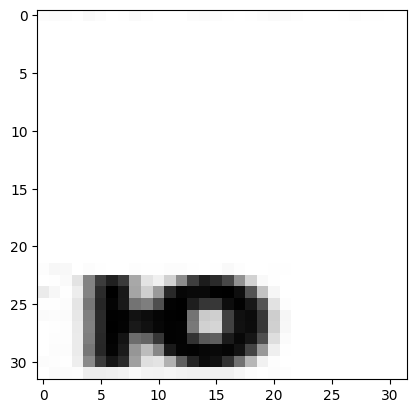

In [24]:
import cv2
import matplotlib.pyplot as plt

input_shape = (32,32,1)

let = cv2.imread('data/letterlist.jpg', 0)
let = let[15:780,:]
num_letters = 33
num_fonts = 21

def get_letter(font_num, letter_num):
    letter = let[let.shape[0]//num_fonts*(font_num-1):let.shape[0]//num_fonts*font_num,
           let.shape[1]//num_letters*(letter_num-1):let.shape[1]//num_letters*letter_num,
           ]
    return cv2.resize(letter, input_shape[:-1])

def get_letter_variants(letter_num):
        return let[:,
           let.shape[1]//num_letters*(letter_num-1):let.shape[1]//num_letters*letter_num,
           ]

def get_font_variants(font_num):
    return let[let.shape[0]//num_fonts*(font_num-1):let.shape[0]//num_fonts*font_num,
           :,
           ]
test = get_letter(21,33)
print(test.shape)
plt.imshow(test, cmap='gray')

In [25]:
from utils.augmenters import *

images = []
captions = []
captions_base = "Ё Й Ц У К Е Н Г Ш Щ З Х Ъ Ф Ы В А П Р О Л Д Ж Э Я Ч С М И Т Ь Б Ю".split(' ')
for i in range(1, num_fonts+1):
    for j in range(1, num_letters+1):
        images.append(get_letter(i,j))
        captions.append(captions_base[j-1])

aug = MultipleAugmenter(images.copy(), captions.copy())
aug.random_augment(3, 65, 0)


x_data = np.array(aug.images)
x_data = x_data.reshape(*x_data.shape, 1)
classes = list(map(captions_base.index, aug.captions))
y_data = keras.utils.to_categorical(classes, num_classes=num_letters)


693
1099
1727


In [26]:
from utils.funcs import patch_extract

def augment(x):
    return x

batch_size = 32

dataset = (
    tf.data.Dataset.from_tensor_slices((x_data, y_data))
    .map(lambda x, y: (augment(x), y))
    .batch(batch_size=batch_size)
    .map(lambda x, y: (patch_extract(x), y))
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [27]:
model.load_weights('models/swin.weights.h5')

In [28]:
model.evaluate(dataset)

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9539 - loss: 0.8274 - top-5-accuracy: 0.9888


[0.963010847568512, 0.9139167666435242, 0.9766858220100403]